In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.tsa.api import acf, graphics, pacf
from statsmodels.tsa.ar_model import AutoReg, ar_select_order
from statsmodels.tsa.vector_ar.var_model import VAR


In [2]:

data_df = pd.read_csv('/Users/sebastianlorenzen-schmidt/neuefische/capstone_project/data/raw-owid-energy-data.csv')
data_df['year'] = pd.to_datetime(data_df['year'],  yearfirst= True, format= '%Y').dt.year
data_df


,iso_code,country,year,coal_prod_change_pct,coal_prod_change_twh,gas_prod_change_pct,gas_prod_change_twh,oil_prod_change_pct,oil_prod_change_twh,energy_cons_change_pct,...,solar_elec_per_capita,solar_energy_per_capita,gdp,wind_share_elec,wind_cons_change_pct,wind_share_energy,wind_cons_change_twh,wind_consumption,wind_elec_per_capita,wind_energy_per_capita
0,AFG,Afghanistan,1900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,AFG,Afghanistan,1901,NaN,0.000,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,AFG,Afghanistan,1902,NaN,0.000,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,AFG,Afghanistan,1903,NaN,0.000,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,AFG,Afghanistan,1904,NaN,0.000,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17465,ZWE,Zimbabwe,2015,-25.013,-10.847,NaN,NaN,NaN,NaN,-0.789,...,0.579,NaN,2.503057e+10,0.0,NaN,NaN,NaN,NaN,0.0,NaN
17466,ZWE,Zimbabwe,2016,-37.694,-12.257,NaN,NaN,NaN,NaN,-14.633,...,0.641,NaN,2.515176e+10,0.0,NaN,NaN,NaN,NaN,0.0,NaN
17467,ZWE,Zimbabwe,2017,8.375,1.697,NaN,NaN,NaN,NaN,NaN,...,0.773,NaN,NaN,0.0,NaN,NaN,NaN,NaN,0.0,NaN
17468,ZWE,Zimbabwe,2018,22.555,4.952,NaN,NaN,NaN,NaN,NaN,...,0.970,NaN,NaN,0.0,NaN,NaN,NaN,NaN,0.0,NaN


In [3]:
years = range(1990,2020)
world_df = data_df[data_df['country']== 'World']
world_df_slice = world_df[world_df['year'].isin(years)]
world_df_slice

,iso_code,country,year,coal_prod_change_pct,coal_prod_change_twh,gas_prod_change_pct,gas_prod_change_twh,oil_prod_change_pct,oil_prod_change_twh,energy_cons_change_pct,...,solar_elec_per_capita,solar_energy_per_capita,gdp,wind_share_elec,wind_cons_change_pct,wind_share_energy,wind_cons_change_twh,wind_consumption,wind_elec_per_capita,wind_energy_per_capita
17032,OWID_WRL,World,1990,-0.241,-63.590,3.260,622.181,1.913,688.165,1.157,...,0.073,0.202,4.320000e+13,0.030,37.086,0.011,2.730,10.090,0.682,1.894
17033,OWID_WRL,World,1991,-2.718,-715.695,1.312,258.599,-0.270,-98.921,0.702,...,0.093,0.259,4.370000e+13,0.033,12.505,0.012,1.262,11.352,0.756,2.097
17034,OWID_WRL,World,1992,-0.184,-47.256,0.266,53.170,1.448,529.418,0.751,...,0.085,0.237,4.480000e+13,0.038,15.820,0.014,1.796,13.148,0.862,2.391
17035,OWID_WRL,World,1993,-3.013,-770.486,1.161,232.338,-0.142,-52.739,0.696,...,0.100,0.277,4.540000e+13,0.045,20.374,0.016,2.679,15.827,1.022,2.835
17036,OWID_WRL,World,1994,2.287,567.039,1.440,291.644,1.385,513.219,1.280,...,0.106,0.294,4.650000e+13,0.055,25.017,0.020,3.959,19.786,1.259,3.494
17037,OWID_WRL,World,1995,3.053,774.371,1.652,339.314,1.372,515.471,2.092,...,0.112,0.310,4.830000e+13,0.062,15.991,0.023,3.164,22.950,1.440,3.995
17038,OWID_WRL,World,1996,1.362,356.015,4.820,1006.601,2.663,1014.076,2.936,...,0.121,0.336,4.980000e+13,0.067,11.410,0.025,2.619,25.568,1.582,4.389
17039,OWID_WRL,World,1997,1.469,389.328,-0.027,-5.984,2.230,871.831,0.950,...,0.128,0.356,5.140000e+13,0.085,30.563,0.032,7.814,33.383,2.038,5.653
17040,OWID_WRL,World,1998,-1.799,-483.661,2.621,573.517,2.528,1010.160,0.625,...,0.139,0.386,5.210000e+13,0.110,32.480,0.042,10.843,44.226,2.664,7.390
17041,OWID_WRL,World,1999,0.031,8.201,2.863,642.990,-2.266,-928.269,1.808,...,0.151,0.420,5.400000e+13,0.142,33.257,0.055,14.708,58.934,3.503,9.718


In [4]:
world_df_slice.describe()

,year,coal_prod_change_pct,coal_prod_change_twh,gas_prod_change_pct,gas_prod_change_twh,oil_prod_change_pct,oil_prod_change_twh,energy_cons_change_pct,energy_cons_change_twh,biofuel_share_elec,...,solar_elec_per_capita,solar_energy_per_capita,gdp,wind_share_elec,wind_cons_change_pct,wind_share_energy,wind_cons_change_twh,wind_consumption,wind_elec_per_capita,wind_energy_per_capita
count,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,20.000000,...,30.000000,30.000000,2.700000e+01,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000
mean,2004.500000,1.962267,671.778200,2.503733,693.600067,1.255467,536.366367,1.844267,2273.955933,1.522950,...,12.836933,32.919400,6.916667e+13,1.396600,23.174433,0.544000,117.756367,810.135800,43.642067,111.067167
std,8.803408,3.349280,1203.227366,1.819725,563.372071,1.814997,781.631093,1.330224,1716.562992,0.438957,...,24.210412,61.256715,2.147428e+13,1.687142,9.095940,0.668418,131.514208,1058.958036,55.748195,139.442217
min,1990.000000,-5.181000,-2326.870000,-3.117000,-944.242000,-2.509000,-1166.638000,-1.512000,-2058.968000,0.971000,...,0.073000,0.202000,4.320000e+13,0.030000,10.454000,0.011000,1.262000,10.090000,0.682000,1.894000
25%,1997.250000,-0.148250,-39.507750,1.493000,391.345250,0.036500,18.346000,0.963000,1092.209500,1.137500,...,0.130750,0.363500,5.060000e+13,0.091250,16.245000,0.034500,8.571250,36.093750,2.194500,6.087250
50%,2004.500000,1.500500,541.399000,2.482000,656.294500,1.208500,497.109500,1.575500,2060.317500,1.454000,...,0.508500,1.479500,6.240000e+13,0.550500,21.450000,0.204500,54.284500,255.195500,14.563000,39.229500
75%,2011.750000,4.349250,1525.397500,3.414000,930.971750,2.390250,1013.097000,2.742500,3296.943750,1.935250,...,12.208000,33.321250,8.575000e+13,2.328750,28.252500,0.901750,213.942250,1310.972750,71.598500,184.456000
max,2019.000000,8.663000,3060.593000,7.199000,2112.975000,4.996000,2157.278000,4.859000,6446.809000,2.211000,...,91.371000,232.450000,1.070000e+14,5.471000,48.099000,2.183000,428.736000,3540.051000,183.897000,458.944000


In [5]:
world_df_slice.isnull().nunique()

iso_code                  1
country                   1
year                      1
coal_prod_change_pct      1
coal_prod_change_twh      1
                         ..
wind_share_energy         1
wind_cons_change_twh      1
wind_consumption          1
wind_elec_per_capita      1
wind_energy_per_capita    1
Length: 124, dtype: int64

In [6]:
world_df_nrg_mix = world_df_slice[['year',
                                    'biofuel_share_energy',
                                    'coal_share_energy',
                                    'gas_share_energy',
                                    'nuclear_share_energy',
                                    'hydro_share_energy',
                                    'oil_share_energy',
                                    'solar_share_energy',
                                    'wind_share_energy',
                                    'other_renewables_share_energy',
                                    'fossil_share_energy',
                                    'low_carbon_share_energy',
                                    'renewables_share_energy']]
world_df_nrg_mix.head()

,year,biofuel_share_energy,coal_share_energy,gas_share_energy,nuclear_share_energy,hydro_share_energy,oil_share_energy,solar_share_energy,wind_share_energy,other_renewables_share_energy,fossil_share_energy,low_carbon_share_energy,renewables_share_energy
17032,1990,0.108,27.240,20.496,5.845,6.308,39.648,0.001,0.011,0.342,87.385,12.615,6.770
17033,1991,0.113,26.786,20.867,6.082,6.411,39.372,0.001,0.012,0.354,87.026,12.974,6.892
17034,1992,0.111,26.491,20.806,6.083,6.362,39.756,0.001,0.014,0.377,87.052,12.948,6.865
17035,1993,0.114,26.436,20.870,6.249,6.696,39.229,0.002,0.016,0.387,86.536,13.464,7.216
17036,1994,0.122,26.202,20.733,6.286,6.656,39.583,0.002,0.020,0.397,86.518,13.482,7.196


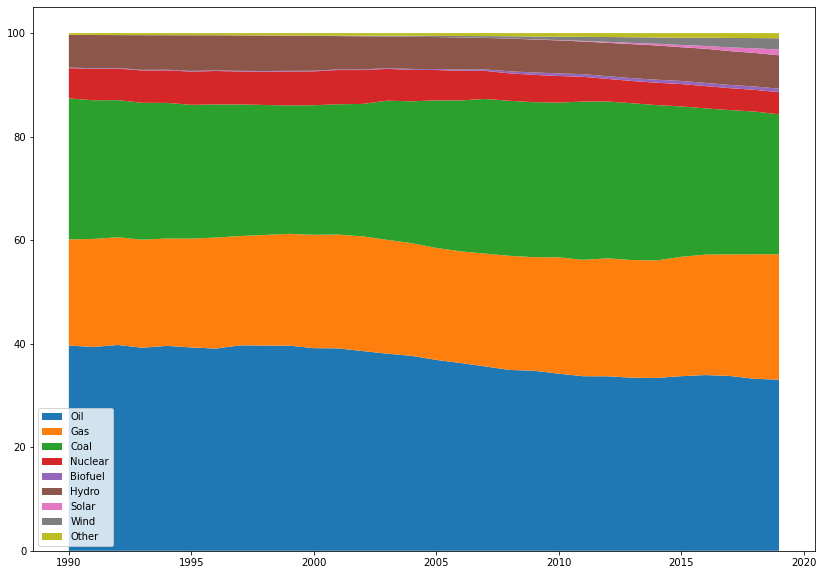

In [7]:
#create graphical representation for energy mix:
plt.figure(figsize=(14,10))
plt.stackplot(world_df_nrg_mix['year'],
                world_df_nrg_mix['oil_share_energy'],
                world_df_nrg_mix['gas_share_energy'],
                world_df_nrg_mix['coal_share_energy'],
                world_df_nrg_mix['nuclear_share_energy'],
                world_df_nrg_mix['biofuel_share_energy'],
                world_df_nrg_mix['hydro_share_energy'],
                world_df_nrg_mix['solar_share_energy'],
                world_df_nrg_mix['wind_share_energy'],
                world_df_nrg_mix['other_renewables_share_energy'],
                labels=['Oil','Gas','Coal','Nuclear','Biofuel','Hydro','Solar','Wind','Other'])
plt.legend(loc='lower left')


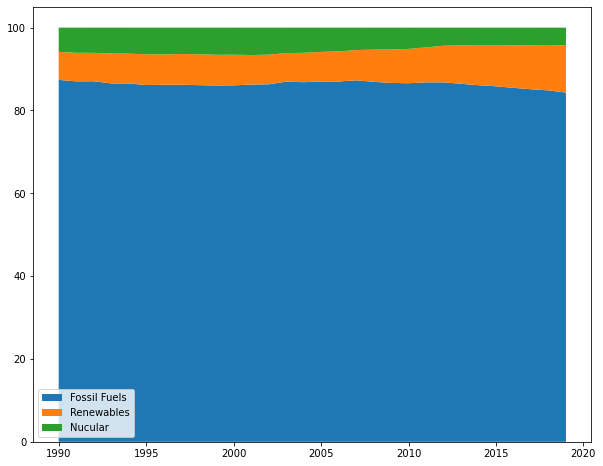

In [8]:
plt.figure(figsize=(10,8))
plt.stackplot(world_df_nrg_mix['year'],
                world_df_nrg_mix['fossil_share_energy'],
                world_df_nrg_mix['renewables_share_energy'],
                world_df_nrg_mix['nuclear_share_energy'],
                labels=['Fossil Fuels','Renewables','Nucular'])
plt.legend(loc='lower left')

In [9]:
#data for the relevant years:

data_y_slice = data_df[data_df['year'].isin(years)]
data_y_slice


,iso_code,country,year,coal_prod_change_pct,coal_prod_change_twh,gas_prod_change_pct,gas_prod_change_twh,oil_prod_change_pct,oil_prod_change_twh,energy_cons_change_pct,...,solar_elec_per_capita,solar_energy_per_capita,gdp,wind_share_elec,wind_cons_change_pct,wind_share_energy,wind_cons_change_twh,wind_consumption,wind_elec_per_capita,wind_energy_per_capita
90,AFG,Afghanistan,1990,-17.323,-0.128,NaN,NaN,NaN,NaN,-0.942,...,NaN,NaN,2.702746e+10,NaN,NaN,NaN,NaN,NaN,NaN,NaN
91,AFG,Afghanistan,1991,-10.476,-0.064,NaN,NaN,NaN,NaN,-56.839,...,NaN,NaN,2.407639e+10,NaN,NaN,NaN,NaN,NaN,NaN,NaN
92,AFG,Afghanistan,1992,-91.489,-0.499,NaN,NaN,NaN,NaN,-34.352,...,NaN,NaN,2.447247e+10,NaN,NaN,NaN,NaN,NaN,NaN,NaN
93,AFG,Afghanistan,1993,-12.501,-0.006,NaN,NaN,NaN,NaN,-0.294,...,NaN,NaN,1.836324e+10,NaN,NaN,NaN,NaN,NaN,NaN,NaN
94,AFG,Afghanistan,1994,-14.285,-0.006,NaN,NaN,NaN,NaN,-3.561,...,NaN,NaN,1.427119e+10,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17465,ZWE,Zimbabwe,2015,-25.013,-10.847,NaN,NaN,NaN,NaN,-0.789,...,0.579,NaN,2.503057e+10,0.0,NaN,NaN,NaN,NaN,0.0,NaN
17466,ZWE,Zimbabwe,2016,-37.694,-12.257,NaN,NaN,NaN,NaN,-14.633,...,0.641,NaN,2.515176e+10,0.0,NaN,NaN,NaN,NaN,0.0,NaN
17467,ZWE,Zimbabwe,2017,8.375,1.697,NaN,NaN,NaN,NaN,NaN,...,0.773,NaN,NaN,0.0,NaN,NaN,NaN,NaN,0.0,NaN
17468,ZWE,Zimbabwe,2018,22.555,4.952,NaN,NaN,NaN,NaN,NaN,...,0.970,NaN,NaN,0.0,NaN,NaN,NaN,NaN,0.0,NaN


In [10]:
continents = ['Africa','Asia Pacific','Europe','North America','South & Central America','Australia']
data_continents_df = data_y_slice[data_y_slice['country'].isin(continents)] 
data_continents_df

,iso_code,country,year,coal_prod_change_pct,coal_prod_change_twh,gas_prod_change_pct,gas_prod_change_twh,oil_prod_change_pct,oil_prod_change_twh,energy_cons_change_pct,...,solar_elec_per_capita,solar_energy_per_capita,gdp,wind_share_elec,wind_cons_change_pct,wind_share_energy,wind_cons_change_twh,wind_consumption,wind_elec_per_capita,wind_energy_per_capita
210,NaN,Africa,1990,-0.588,-7.224,6.522,44.183,7.171,246.938,3.286,...,0.0,0.0,NaN,0.000,NaN,0.000,0.000,0.000,0.000,0.000
211,NaN,Africa,1991,1.932,23.589,7.187,51.861,3.739,138.001,-0.087,...,0.0,0.0,NaN,0.000,NaN,0.000,0.000,0.000,0.000,0.000
212,NaN,Africa,1992,2.275,28.325,4.503,34.831,1.896,72.582,1.694,...,0.0,0.0,NaN,0.000,NaN,0.000,0.000,0.000,0.000,0.000
213,NaN,Africa,1993,1.874,23.858,3.108,25.124,-1.304,-50.855,0.369,...,0.0,0.0,NaN,0.001,NaN,0.000,0.006,0.006,0.003,0.008
214,NaN,Africa,1994,3.935,51.035,-5.251,-43.761,-0.201,-7.755,2.947,...,0.0,0.0,NaN,0.002,170.0,0.001,0.009,0.015,0.008,0.021
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14219,NaN,South & Central America,2015,-5.048,-39.909,1.131,19.903,1.339,61.129,0.137,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
14220,NaN,South & Central America,2016,3.964,29.755,-0.097,-1.725,-4.831,-223.487,-1.044,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
14221,NaN,South & Central America,2017,-1.784,-13.925,2.007,35.696,-3.103,-136.620,0.400,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
14222,NaN,South & Central America,2018,-6.646,-50.944,-2.909,-52.789,-9.251,-394.586,-0.298,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [11]:
data_africa = data_continents_df[data_continents_df['country'] == 'Africa'] 
data_africa.to_csv(path_or_buf= 'data/data_africa.csv')
data_asia_pacific = data_continents_df[data_continents_df['country'] == 'Asia Pacific'] 
data_asia_pacific.to_csv(path_or_buf= 'data/data_asia_pacific.csv')
data_NA = data_continents_df[data_continents_df['country'] == 'North America']
data_NA.to_csv(path_or_buf= 'data/data_NA.csv') 
data_SCA = data_continents_df[data_continents_df['country'] == 'South & Cental America'] 
data_SCA.to_csv(path_or_buf= 'data/data_SCA.csv')
data_eur = data_continents_df[data_continents_df['country'] == 'Europe'] 
data_eur.to_csv(path_or_buf='data/data_europe.csv')
data_aus = data_continents_df[data_continents_df['country'] == 'Australia'] 
data_aus.to_csv(path_or_buf= 'data/data_australia.csv')


In [12]:
data_eur

,iso_code,country,year,coal_prod_change_pct,coal_prod_change_twh,gas_prod_change_pct,gas_prod_change_twh,oil_prod_change_pct,oil_prod_change_twh,energy_cons_change_pct,...,solar_elec_per_capita,solar_energy_per_capita,gdp,wind_share_elec,wind_cons_change_pct,wind_share_energy,wind_cons_change_twh,wind_consumption,wind_elec_per_capita,wind_energy_per_capita
5382,NaN,Europe,1990,-8.079,-501.694,-1.787,-44.260,2.661,67.165,0.952,...,0.017,0.048,NaN,0.024,51.234,0.009,0.734,2.165,1.080,3.004
5383,NaN,Europe,1991,-9.230,-526.867,3.368,81.898,4.989,129.261,-1.448,...,0.021,0.060,NaN,0.030,25.732,0.011,0.557,2.722,1.354,3.766
5384,NaN,Europe,1992,-5.152,-266.957,-1.394,-35.039,6.450,175.460,-2.950,...,0.037,0.104,NaN,0.048,56.633,0.018,1.542,4.264,2.117,5.886
5385,NaN,Europe,1993,-9.153,-449.824,4.022,99.700,4.661,134.976,-1.980,...,0.045,0.124,NaN,0.072,48.844,0.027,2.083,6.347,3.145,8.746
5386,NaN,Europe,1994,-9.088,-405.760,0.062,1.593,16.116,488.422,-2.133,...,0.052,0.144,NaN,0.093,30.392,0.036,1.929,8.276,4.096,11.391
5387,NaN,Europe,1995,-0.958,-38.902,3.199,82.546,3.994,140.546,1.950,...,0.064,0.179,NaN,0.118,29.665,0.046,2.455,10.731,5.307,14.760
5388,NaN,Europe,1996,-5.138,-206.545,12.647,336.734,5.069,185.493,2.751,...,0.074,0.206,NaN,0.144,24.995,0.056,2.682,13.413,6.634,18.449
5389,NaN,Europe,1997,0.041,1.553,-1.471,-44.117,-0.004,-0.162,-0.498,...,0.088,0.244,NaN,0.215,51.090,0.085,6.853,20.265,10.027,27.888
5390,NaN,Europe,1998,-8.422,-321.300,-0.349,-10.302,-0.861,-33.104,0.984,...,0.120,0.333,NaN,0.322,53.197,0.129,10.781,31.046,15.372,42.754
5391,NaN,Europe,1999,-4.099,-143.194,2.734,80.522,1.585,60.412,-0.452,...,0.126,0.349,NaN,0.406,27.449,0.165,8.522,39.568,19.603,54.523


Text(0.5, 1.0, 'Energy Mix Europe')

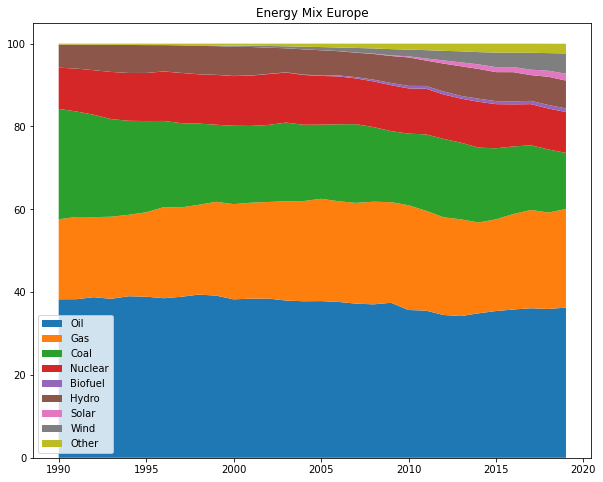

In [13]:
plt.figure(figsize=(10,8))
plt.stackplot( data_eur['year'],
                data_eur['oil_share_energy'], 
                data_eur['gas_share_energy'], 
                data_eur['coal_share_energy'],
                data_eur['nuclear_share_energy'],
                data_eur['biofuel_share_energy'],
                data_eur['hydro_share_energy'],
                data_eur['solar_share_energy'],
                data_eur['wind_share_energy'],
                data_eur['other_renewables_share_energy'],
                labels=['Oil','Gas','Coal','Nuclear','Biofuel','Hydro','Solar','Wind','Other'])
plt.legend(loc='lower left')
plt.title('Energy Mix Europe')

## further cleanup



In [14]:
regions = ['Africa','Asia Pacific','Europe','North America','South & Central America','World']

#coal data
df_coal = data_df[[ 'country',
                    'year',
                    'coal_prod_change_pct',
                    'coal_prod_change_twh',
                    'coal_share_elec',
                    'coal_cons_change_pct',
                    'coal_share_energy',
                    'coal_cons_change_twh',
                    'coal_consumption',
                    'coal_elec_per_capita',
                    'coal_production',
                    'coal_prod_per_capita',
                    'coal_electricity']]

df_coal2 = df_coal[df_coal['year'].isin(years)]
#df_coal2.to_csv(path_or_buf= 'data/data_coal.csv')
df_coal2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7139 entries, 90 to 17469
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   country               7139 non-null   object 
 1   year                  7139 non-null   int64  
 2   coal_prod_change_pct  2526 non-null   float64
 3   coal_prod_change_twh  4201 non-null   float64
 4   coal_share_elec       4914 non-null   float64
 5   coal_cons_change_pct  2287 non-null   float64
 6   coal_share_energy     2490 non-null   float64
 7   coal_cons_change_twh  2487 non-null   float64
 8   coal_consumption      2970 non-null   float64
 9   coal_elec_per_capita  4818 non-null   float64
 10  coal_production       4228 non-null   float64
 11  coal_prod_per_capita  3869 non-null   float64
 12  coal_electricity      4950 non-null   float64
dtypes: float64(11), int64(1), object(1)
memory usage: 780.8+ KB


In [15]:
#oil data
df_oil = data_df[[ 'country',
                    'year',
                    'oil_prod_change_pct',
                    'oil_prod_change_twh',
                    'oil_share_elec',
                    'oil_cons_change_pct',
                    'oil_share_energy',
                    'oil_cons_change_twh',
                    'oil_consumption',
                    'oil_elec_per_capita',
                    'oil_production',
                    'oil_prod_per_capita',
                    'oil_electricity']]

df_oil2 = df_oil[df_coal['year'].isin(years)]
#df_oil2.to_csv(path_or_buf= 'data/data_oil.csv')
df_oil2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7139 entries, 90 to 17469
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   country              7139 non-null   object 
 1   year                 7139 non-null   int64  
 2   oil_prod_change_pct  2674 non-null   float64
 3   oil_prod_change_twh  2633 non-null   float64
 4   oil_share_elec       4914 non-null   float64
 5   oil_cons_change_pct  2487 non-null   float64
 6   oil_share_energy     2490 non-null   float64
 7   oil_cons_change_twh  2487 non-null   float64
 8   oil_consumption      2970 non-null   float64
 9   oil_elec_per_capita  4818 non-null   float64
 10  oil_production       2660 non-null   float64
 11  oil_prod_per_capita  2384 non-null   float64
 12  oil_electricity      4950 non-null   float64
dtypes: float64(11), int64(1), object(1)
memory usage: 780.8+ KB


In [16]:
#gas data
df_gas = data_df[[ 'country',
                    'year',
                    'gas_prod_change_pct',
                    'gas_prod_change_twh',
                    'gas_share_elec',
                    'gas_cons_change_pct',
                    'gas_share_energy',
                    'gas_cons_change_twh',
                    'gas_consumption',
                    'gas_elec_per_capita',
                    'gas_production',
                    'gas_prod_per_capita',
                    'gas_electricity']]

df_gas2 = df_gas[df_gas['year'].isin(years)]
#df_gas2.to_csv(path_or_buf= 'data/data_gas.csv')

In [17]:
#biofuels data
df_biofuel = data_df[[ 'country',
                    'year',
                    #'biofuel_prod_change_pct',
                    #'biofuel_prod_change_twh',
                    'biofuel_share_elec',
                    'biofuel_cons_change_pct',
                    'biofuel_share_energy',
                    'biofuel_cons_change_twh',
                    'biofuel_consumption',
                    'biofuel_elec_per_capita',
                    #'biofuel_production',
                    #'biofuel_prod_per_capita',
                    'biofuel_electricity',
                    'biofuel_cons_per_capita']]

df_biofuel2 = df_biofuel[df_biofuel['year'].isin(years)]
##df_biofuel2.to_csv(path_or_buf= 'data/data_biofuel.csv')

In [18]:
#fossils data
df_fossil = data_df[[ 'country',
                    'year',
                    #'fossil_prod_change_pct',
                    #'fossil_prod_change_twh',
                    'fossil_share_elec',
                    'fossil_cons_change_pct',
                    'fossil_share_energy',
                    'fossil_cons_change_twh',
                    'fossil_fuel_consumption',
                    'fossil_energy_per_capita',
                    #'fossil_production',
                    #'fossil_prod_per_capita',
                    'fossil_electricity',
                    'fossil_cons_per_capita']]

df_fossil2 = df_fossil[df_fossil['year'].isin(years)]
##df_fossil2.to_csv(path_or_buf= 'data/data_fossils.csv')

In [19]:
#Nuclear data
df_nuclear = data_df[[ 'country',
                    'year',
                    #'nuclear_prod_change_pct',
                    #'nuclear_prod_change_twh',
                    'nuclear_share_elec',
                    'nuclear_cons_change_pct',
                    'nuclear_share_energy',
                    'nuclear_cons_change_twh',
                    'nuclear_consumption',
                    'nuclear_energy_per_capita',
                    'nuclear_elec_per_capita',
                    #'nuclear_production',
                    #'nuclear_prod_per_capita',
                    'nuclear_electricity',
                    #'nuclear_cons_per_capita'
                    ]]

df_nuclear2 = df_nuclear[df_nuclear['year'].isin(years)]
#df_nuclear2.to_csv(path_or_buf= 'data/data_nuclear.csv')

In [20]:
#Hydropower data
df_hydro = data_df[[ 'country',
                    'year',
                    #'hydro_prod_change_pct',
                    #'hydro_prod_change_twh',
                    'hydro_share_elec',
                    'hydro_cons_change_pct',
                    'hydro_share_energy',
                    'hydro_cons_change_twh',
                    'hydro_consumption',
                    'hydro_energy_per_capita',
                    'hydro_elec_per_capita',
                    #'hydro_production',
                    #'hydro_prod_per_capita',
                    'hydro_electricity',
                    #'hydro_cons_per_capita'
                    ]]

df_hydro2 = df_hydro[df_hydro['year'].isin(years)]
##df_hydro2.to_csv(path_or_buf= 'data/data_hydro.csv')

In [21]:
#low_carbon data
df_lowcarb = data_df[[ 'country',
                    'year',
                    #'low_carbon_prod_change_pct',
                    #'low_carbon_prod_change_twh',
                    'low_carbon_share_elec',
                    'low_carbon_cons_change_pct',
                    'low_carbon_share_energy',
                    'low_carbon_cons_change_twh',
                    'low_carbon_consumption',
                    'low_carbon_energy_per_capita',
                    'low_carbon_elec_per_capita',
                    #'low_carbon_production',
                    #'low_carbon_prod_per_capita',
                    'low_carbon_electricity',
                    #'low_carbon_cons_per_capita'
                    ]]

df_lowcarb2 = df_lowcarb[df_lowcarb['year'].isin(years)]
#df_lowcarb2.to_csv(path_or_buf= 'data/data_low_carbon.csv')

In [22]:
#other renewables data
df_other_renew = data_df[[ 'country',
                    'year',
                    #'other_renewables_prod_change_pct',
                    #'other_renewables_prod_change_twh',
                    'other_renewables_share_elec',
                    'other_renewables_share_elec_exc_biofuel',
                    'other_renewables_cons_change_pct',
                    'other_renewables_share_energy',
                    'other_renewables_cons_change_twh',
                    'other_renewable_consumption',
                    'other_renewables_energy_per_capita',
                    'other_renewables_elec_per_capita',
                    'other_renewables_elec_per_capita_exc_biofuel',
                    #'other_renewables_production',
                    #'other_renewables_prod_per_capita',
                    'other_renewable_electricity',
                    'other_renewable_exc_biofuel_electricity',
                    #'other_renewables_cons_per_capita'
                    ]]

df_other_renew2 = df_other_renew[df_other_renew['year'].isin(years)]
#df_other_renew2.to_csv(path_or_buf= 'data/data_other_renewables.csv')

In [23]:
#solar data
df_solar = data_df[[ 'country',
                    'year',
                    #'solar_prod_change_pct',
                    #'solar_prod_change_twh',
                    'solar_share_elec',
                    'solar_cons_change_pct',
                    'solar_share_energy',
                    'solar_cons_change_twh',
                    'solar_consumption',
                    'solar_energy_per_capita',
                    'solar_elec_per_capita',
                    #'solar_production',
                    #'solar_prod_per_capita',
                    'solar_electricity',
                    #'solar_cons_per_capita'
                    ]]

df_solar2 = df_solar[df_solar['year'].isin(years)]
#df_solar2.to_csv(path_or_buf= 'data/data_solar.csv')

In [24]:
#wind data
df_wind = data_df[[ 'country',
                    'year',
                    #'wind_prod_change_pct',
                    #'wind_prod_change_twh',
                    'wind_share_elec',
                    'wind_cons_change_pct',
                    'wind_share_energy',
                    'wind_cons_change_twh',
                    'wind_consumption',
                    'wind_energy_per_capita',
                    'wind_elec_per_capita',
                    #'wind_production',
                    #'wind_prod_per_capita',
                    'wind_electricity',
                    #'wind_cons_per_capita'
                    ]]

df_wind2 = df_wind[df_wind['year'].isin(years)]
#df_wind2.to_csv(path_or_buf= 'data/data_wind.csv')

In [25]:
#renewables data
df_renew = data_df[[ 'country',
                    'year',
                    #'renewables_prod_change_pct',
                    #'renewables_prod_change_twh',
                    'renewables_share_elec',
                    'renewables_cons_change_pct',
                    'renewables_share_energy',
                    'renewables_cons_change_twh',
                    'renewables_consumption',
                    'renewables_energy_per_capita',
                    'renewables_elec_per_capita',
                    #'renewables_production',
                    #'renewables_prod_per_capita',
                    'renewables_electricity',
                    #'renewables_cons_per_capita'
                    ]]

df_renew2 = df_renew[df_renew['year'].isin(years)]
#df_renew2.to_csv(path_or_buf= 'data/data_renewables.csv')

In [26]:
#general data
df_general = data_df[[ 'country',
                    'year',
                    'gdp',
                    'energy_per_gdp',
                    'population',
                    'energy_per_capita',
                    'carbon_intensity_elec',
                    'primary_energy_consumption',
                    'electricity_generation',
                    'per_capita_electricity',
                    'biofuel_electricity',
                    'coal_electricity',
                    'fossil_electricity',
                    'gas_electricity',
                    'hydro_electricity',
                    'nuclear_electricity',
                    'oil_electricity',
                    'other_renewable_electricity',
                    'other_renewable_exc_biofuel_electricity',
                    'renewables_electricity',
                    'solar_electricity',
                    'wind_electricity',
                    ]]

df_general2 = df_general[df_general['year'].isin(years)]
##df_general2.to_csv(path_or_buf= 'data/data_general.csv')

In [41]:
df_energy_mix_shares = data_df[['year','country',
                                'biofuel_share_energy',
                                'coal_share_energy',
                                'fossil_share_energy',
                                'gas_share_energy',
                                'hydro_share_energy',
                                'low_carbon_share_energy',
                                'nuclear_share_energy',
                                'oil_share_energy',
                                'other_renewables_share_energy',
                                'renewables_share_energy',
                                'solar_share_energy',
                                'wind_share_energy']]

#df_energy_mix_shares['merge_code'] = df_energy_mix_shares['country'] + df_energy_mix_shares['year'].to_string()
df_energy_mix_shares2 = df_energy_mix_shares[df_energy_mix_shares['year'].isin(years)]
df_energy_mix_shares2.to_csv(path_or_buf='data/energy_mix_shares.csv')
df_energy_mix_shares2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7139 entries, 90 to 17469
Data columns (total 14 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   year                           7139 non-null   int64  
 1   country                        7139 non-null   object 
 2   biofuel_share_energy           2490 non-null   float64
 3   coal_share_energy              2490 non-null   float64
 4   fossil_share_energy            2490 non-null   float64
 5   gas_share_energy               2490 non-null   float64
 6   hydro_share_energy             2490 non-null   float64
 7   low_carbon_share_energy        2490 non-null   float64
 8   nuclear_share_energy           2490 non-null   float64
 9   oil_share_energy               2490 non-null   float64
 10  other_renewables_share_energy  2490 non-null   float64
 11  renewables_share_energy        2490 non-null   float64
 12  solar_share_energy             2490 non-null  

In [28]:
data_ger = df_general2[df_general2['country']== 'Germany']
data_ger

,country,year,gdp,energy_per_gdp,population,energy_per_capita,carbon_intensity_elec,primary_energy_consumption,electricity_generation,per_capita_electricity,...,fossil_electricity,gas_electricity,hydro_electricity,nuclear_electricity,oil_electricity,other_renewable_electricity,other_renewable_exc_biofuel_electricity,renewables_electricity,solar_electricity,wind_electricity
6118,Germany,1990,1.990000e+12,2.100,79053984.0,52872.982,NaN,4179.821,546.82,6917.045,...,375.25,40.46,17.43,152.47,24.75,1.60,0.00,19.10,0.00,0.07
6119,Germany,1991,2.120000e+12,1.924,79490831.0,51304.485,NaN,4078.245,535.83,6740.777,...,371.62,36.11,14.89,147.23,27.84,1.87,0.00,16.98,0.00,0.22
6120,Germany,1992,2.180000e+12,1.833,79963166.0,49970.766,NaN,3995.812,533.66,6673.823,...,355.13,32.89,17.40,158.80,26.57,2.04,0.00,19.73,0.00,0.29
6121,Germany,1993,2.210000e+12,1.800,80428557.0,49460.855,NaN,3978.087,522.49,6496.324,...,348.69,34.57,17.88,153.28,20.87,1.97,0.00,20.52,0.00,0.67
6122,Germany,1994,2.300000e+12,1.713,80832928.0,48748.560,NaN,3940.492,525.21,6497.476,...,351.07,40.25,19.93,150.70,20.53,2.07,0.00,23.44,0.01,1.43
6123,Germany,1995,2.380000e+12,1.664,81138653.0,48811.397,NaN,3960.508,532.81,6566.661,...,353.79,43.18,21.78,153.09,21.47,2.43,0.00,25.93,0.01,1.71
6124,Germany,1996,2.410000e+12,1.698,81323666.0,50310.617,NaN,4091.461,550.69,6771.584,...,364.12,48.02,21.96,160.02,20.11,2.50,0.00,26.55,0.01,2.08
6125,Germany,1997,2.510000e+12,1.609,81399250.0,49608.550,NaN,4038.086,548.01,6732.372,...,354.62,49.73,17.36,170.33,20.55,2.65,0.00,23.06,0.02,3.03
6126,Germany,1998,2.620000e+12,1.529,81402671.0,49214.309,NaN,4006.192,552.38,6785.772,...,365.83,53.83,17.22,161.64,19.74,3.06,0.00,24.91,0.04,4.59
6127,Germany,1999,2.720000e+12,1.452,81389935.0,48523.289,NaN,3949.311,552.54,6788.800,...,353.82,55.06,19.65,170.00,17.49,3.51,0.00,28.72,0.03,5.53


Text(0.5, 1.0, 'Germany Mix Europe')

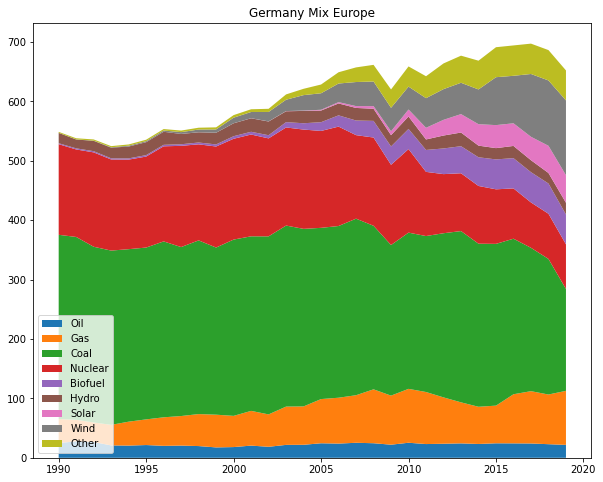

In [29]:
plt.figure(figsize=(10,8))
plt.stackplot( data_ger['year'],
                data_ger['oil_electricity'], 
                data_ger['gas_electricity'], 
                data_ger['coal_electricity'],
                data_ger['nuclear_electricity'],
                data_ger['biofuel_electricity'],
                data_ger['hydro_electricity'],
                data_ger['solar_electricity'],
                data_ger['wind_electricity'],
                data_ger['other_renewable_electricity'],
                labels=['Oil','Gas','Coal','Nuclear','Biofuel','Hydro','Solar','Wind','Other'])
plt.legend(loc='lower left')
plt.title('Germany Mix Europe')



## Regression Ideas

                              OLS Regression Results                              
Dep. Variable:     renewables_electricity   R-squared:                       0.889
Model:                                OLS   Adj. R-squared:                  0.885
Method:                     Least Squares   F-statistic:                     223.5
Date:                    Wed, 30 Mar 2022   Prob (F-statistic):           7.10e-15
Time:                            15:20:32   Log-Likelihood:                -137.09
No. Observations:                      30   AIC:                             278.2
Df Residuals:                          28   BIC:                             281.0
Df Model:                               1                                         
Covariance Type:                nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -

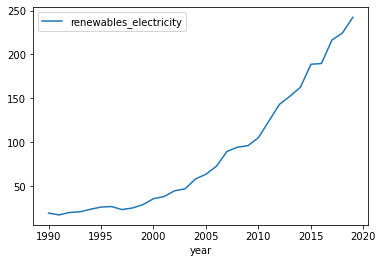

In [30]:
#Testregression for trend development of renewable energy in germany
data_ger.plot('year', 'renewables_electricity', kind = 'line')
X = data_ger['year']

X = sm.add_constant(X)

y = data_ger.renewables_electricity
ger_renew_model=sm.OLS(y,X).fit()
print(ger_renew_model.summary())



In [31]:
print(ger_renew_model.params)
print(ger_renew_model.predict())

ger_mod2 = smf.ols(formula = 'renewables_electricity ~ year', data = data_ger).fit()
#print(ger_mod2.get_prediction(10))

ger_mod2.get_prediction().summary_frame()


const   -15193.817315
year         7.623353
dtype: float64
[-23.3456129  -15.72226029  -8.09890768  -0.47555506   7.14779755
  14.77115017  22.39450278  30.01785539  37.64120801  45.26456062
  52.88791324  60.51126585  68.13461846  75.75797108  83.38132369
  91.00467631  98.62802892 106.25138154 113.87473415 121.49808676
 129.12143938 136.74479199 144.36814461 151.99149722 159.61484983
 167.23820245 174.86155506 182.48490768 190.10826029 197.7316129 ]


,mean,mean_se,mean_ci_lower,mean_ci_upper,obs_ci_lower,obs_ci_upper
6118,-23.345613,8.611273,-40.985007,-5.706219,-75.913836,29.222610
6119,-15.722260,8.177590,-32.473294,1.028774,-67.999091,36.554570
6120,-8.098908,7.753193,-23.980604,7.782789,-60.103697,43.905882
6121,-0.475555,7.339694,-15.510236,14.559126,-52.227961,51.276850
6122,7.147798,6.939040,-7.066182,21.361777,-44.372170,58.667765
6123,14.771150,6.553589,1.346732,28.195569,-36.536596,66.078897
6124,22.394503,6.186182,9.722682,35.066323,-28.721492,73.510497
6125,30.017855,5.840227,18.054692,41.981018,-20.927087,80.962797
6126,37.641208,5.519758,26.334496,48.947920,-13.153591,88.436007
6127,45.264561,5.229462,34.552492,55.976629,-5.401190,95.930311


In [32]:
data_ger['year'] = pd.to_datetime(data_ger['year'], format='%Y')
data_ger

/var/folders/qy/w2kkgqjx1d5f6bhpsw8k_7rh0000gn/T/ipykernel_40572/985329353.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_ger['year'] = pd.to_datetime(data_ger['year'], format='%Y')


,country,year,gdp,energy_per_gdp,population,energy_per_capita,carbon_intensity_elec,primary_energy_consumption,electricity_generation,per_capita_electricity,...,fossil_electricity,gas_electricity,hydro_electricity,nuclear_electricity,oil_electricity,other_renewable_electricity,other_renewable_exc_biofuel_electricity,renewables_electricity,solar_electricity,wind_electricity
6118,Germany,1990-01-01,1.990000e+12,2.100,79053984.0,52872.982,NaN,4179.821,546.82,6917.045,...,375.25,40.46,17.43,152.47,24.75,1.60,0.00,19.10,0.00,0.07
6119,Germany,1991-01-01,2.120000e+12,1.924,79490831.0,51304.485,NaN,4078.245,535.83,6740.777,...,371.62,36.11,14.89,147.23,27.84,1.87,0.00,16.98,0.00,0.22
6120,Germany,1992-01-01,2.180000e+12,1.833,79963166.0,49970.766,NaN,3995.812,533.66,6673.823,...,355.13,32.89,17.40,158.80,26.57,2.04,0.00,19.73,0.00,0.29
6121,Germany,1993-01-01,2.210000e+12,1.800,80428557.0,49460.855,NaN,3978.087,522.49,6496.324,...,348.69,34.57,17.88,153.28,20.87,1.97,0.00,20.52,0.00,0.67
6122,Germany,1994-01-01,2.300000e+12,1.713,80832928.0,48748.560,NaN,3940.492,525.21,6497.476,...,351.07,40.25,19.93,150.70,20.53,2.07,0.00,23.44,0.01,1.43
6123,Germany,1995-01-01,2.380000e+12,1.664,81138653.0,48811.397,NaN,3960.508,532.81,6566.661,...,353.79,43.18,21.78,153.09,21.47,2.43,0.00,25.93,0.01,1.71
6124,Germany,1996-01-01,2.410000e+12,1.698,81323666.0,50310.617,NaN,4091.461,550.69,6771.584,...,364.12,48.02,21.96,160.02,20.11,2.50,0.00,26.55,0.01,2.08
6125,Germany,1997-01-01,2.510000e+12,1.609,81399250.0,49608.550,NaN,4038.086,548.01,6732.372,...,354.62,49.73,17.36,170.33,20.55,2.65,0.00,23.06,0.02,3.03
6126,Germany,1998-01-01,2.620000e+12,1.529,81402671.0,49214.309,NaN,4006.192,552.38,6785.772,...,365.83,53.83,17.22,161.64,19.74,3.06,0.00,24.91,0.04,4.59
6127,Germany,1999-01-01,2.720000e+12,1.452,81389935.0,48523.289,NaN,3949.311,552.54,6788.800,...,353.82,55.06,19.65,170.00,17.49,3.51,0.00,28.72,0.03,5.53


In [33]:
#TSA test:

#conversion datetime to datetimeindex:
data_ger2 = data_ger[['year','renewables_electricity']]
data_ger2.reset_index(drop=True,inplace = True)
data_ger2.set_index(pd.DatetimeIndex(data_ger['year']))
data_ger2
ger_mod3 = AutoReg(data_ger2['renewables_electricity'],1, trend="n").fit()

ger_mod3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              AutoReg Model Results                               
==================================================================================
Dep. Variable:     renewables_electricity   No. Observations:                   30
Model:                         AutoReg(1)   Log Likelihood                 -93.949
Method:                   Conditional MLE   S.D. of innovations              6.176
Date:                    Wed, 30 Mar 2022   AIC                            191.899
Time:                            15:20:32   BIC                            194.633
Sample:                                 1   HQIC                           192.755
                                       30                                         
=============================================================================================
                                coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------
renewables_electricity.L1     1.0868      0.011     98.964      0.000       1.065       1.108
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            0.9201           +0.0000j            0.9201            0.0000
-----------------------------------------------------------------------------
"""

<AxesSubplot:xlabel='year'>

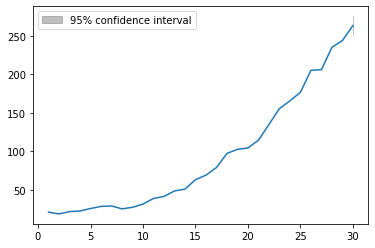

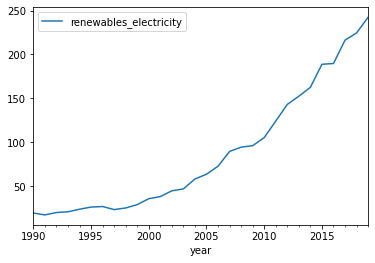

In [34]:
fig = ger_mod3.plot_predict( 1 , 30)
data_ger.plot('year', 'renewables_electricity', kind = 'line')

In [35]:
data_eur['year'] = pd.to_datetime(data_eur.year , format = '%Y')
time_series = data_eur.drop(['year'], axis=1)
data_eur.index = data_eur.year

data_eur.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 30 entries, 1990-01-01 to 2019-01-01
Columns: 124 entries, iso_code to wind_energy_per_capita
dtypes: datetime64[ns](1), float64(121), object(2)
memory usage: 29.3+ KB


/var/folders/qy/w2kkgqjx1d5f6bhpsw8k_7rh0000gn/T/ipykernel_40572/3792321702.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_eur['year'] = pd.to_datetime(data_eur.year , format = '%Y')


In [36]:
data_eur.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 30 entries, 1990-01-01 to 2019-01-01
Columns: 124 entries, iso_code to wind_energy_per_capita
dtypes: datetime64[ns](1), float64(121), object(2)
memory usage: 29.3+ KB


In [37]:
nrg_mix_eur = data_eur[[
                'oil_share_energy', 
                'gas_share_energy', 
                'coal_share_energy',
                'nuclear_share_energy',
                'biofuel_share_energy',
                'hydro_share_energy',
                'solar_share_energy',
                'wind_share_energy',
                'other_renewables_share_energy']]




In [38]:
model = VAR(endog=nrg_mix_eur)
model_fit = model.fit()
model_fit.summary()

/opt/homebrew/Caskroom/miniconda/base/envs/nf_base/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  warnings.warn('No frequency information was'


  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Wed, 30, Mar, 2022
Time:                     15:20:32
--------------------------------------------------------------------
No. of Equations:         9.00000    BIC:                   -45.1875
Nobs:                     29.0000    HQIC:                  -48.1019
Log likelihood:           436.404    FPE:                4.44273e-22
AIC:                     -49.4308    Det(Omega_mle):     3.08781e-23
--------------------------------------------------------------------
Results for equation oil_share_energy
                                      coefficient       std. error           t-stat            prob
---------------------------------------------------------------------------------------------------
const                                 3904.964641      3911.451592            0.998           0.318
L1.oil_share_energy                    -38.458016        39.095628       

[[ 37.33390659  23.98018011  11.29758542   9.98437452   0.88745529
    6.74605409   1.83615053   5.49285094   2.40751826]
 [ 38.55969042  24.93159372   8.08738145   9.97641392   0.89056874
    6.73665109   2.03816658   6.2750328    2.45637779]
 [ 40.24021572  26.21200749   3.91428926  10.06821318   0.89615132
    6.64767511   2.26238604   7.20207099   2.48936199]
 [ 42.38872458  28.04716196  -1.56157067  10.20970485   0.89758358
    6.52598308   2.52448926   8.36421906   2.51028398]
 [ 45.19382764  30.5064168   -8.71490147  10.44447596   0.89585705
    6.34934877   2.8414884    9.83466867   2.52150092]
 [ 48.84694379  33.78195122 -18.05698194  10.78549438   0.89009319
    6.1126515    3.23229875  11.71160412   2.52438768]
 [ 53.59957106  38.11682286 -30.23810208  11.25728714   0.88021836
    5.79543262   3.7201974   14.11990047   2.51961105]
 [ 59.76723968  43.82524262 -46.08965009  11.89130151   0.86659975
    5.37409064   4.33506583  17.21886657   2.50757733]
 [ 67.75341748  51.30917

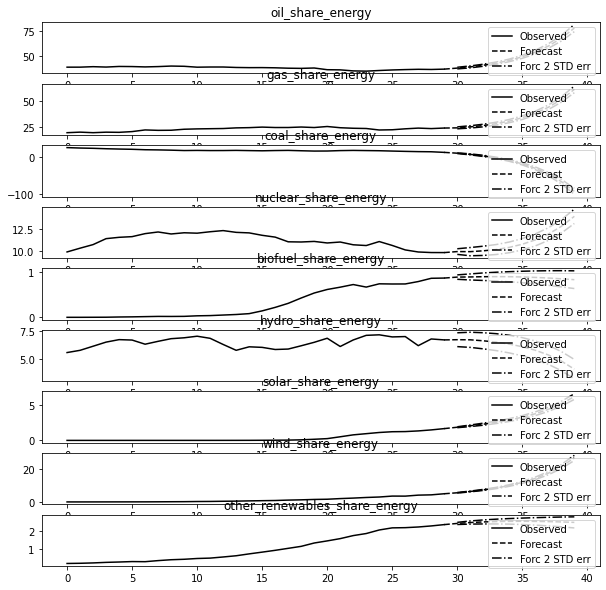

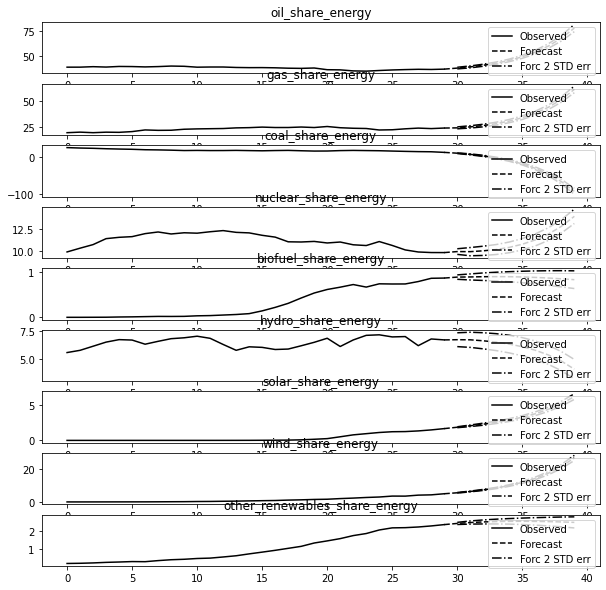

In [39]:
lag_order = model_fit.k_ar
print(model_fit.forecast(nrg_mix_eur.values[-lag_order:], 10))
model_fit.plot_forecast(10)

In [40]:
df_energy_mix_shares = data_df[['year','country',
                                'biofuel_share_energy',
                                'coal_share_energy',
                                'fossil_share_energy',
                                'gas_share_energy',
                                'hydro_share_energy',
                                'low_carbon_share_energy',
                                'nuclear_share_energy',
                                'oil_share_energy',
                                'other_renewables_share_energy',
                                'renewables_share_energy',
                                'solar_share_energy',
                                'wind_share_energy']]

df_energy_mix_shares2 = df_energy_mix_shares[df_energy_mix_shares['year'].isin(years)]
#df_energy_mix_shares2.to_csv(path_or_buf='data/energy_mix_shares.csv')